# BankCraft Agent Diary Example

This notebook demonstrates how to use the agent action logging functionality in BankCraft to track and view the actions of individual agents.

In [1]:
import os
import sys
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Add src to path
project_root = Path().absolute().parent
src_path = str(project_root / "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Now you can import bankcraft normally
from bankcraft import BankCraftModel
from bankcraft import Visualization
from bankcraft.config import time_units
from bankcraft.agent.person import Person

## Setting Up the Model

First, let's create a BankCraft model with a small number of agents so we can easily track their actions.

In [2]:
# Create a model with a small number of agents
model = BankCraftModel(num_people=5, initial_money=1000, num_banks=1, width=10, height=10)

# Run the model for a day to generate some actions
model.run(duration="1 day")

print(f"Model ran for {model.steps} steps")
print(f"Current simulation time: {model.current_time}")

Model ran for 144 steps
Current simulation time: 2023-01-02 00:00:00


## Viewing Agent Actions

Now that the model has run, we can view the actions that were logged for each agent.

In [3]:
# Get a list of all person agents
person_agents = [agent for agent in model.agents if isinstance(agent, Person)]

# Display the IDs of all person agents
print("Person Agent IDs:")
for agent in person_agents:
    print(f"ID: {agent.unique_id}, Type: {agent.type}")

Person Agent IDs:
ID: 12, Type: person
ID: 13, Type: person
ID: 14, Type: person
ID: 15, Type: person
ID: 16, Type: person


In [4]:
# Get all actions for all agents
all_actions = model.get_agent_actions()

# Display the total number of actions logged
print(f"Total actions logged: {len(all_actions)}")

# Display the first 10 actions
all_actions.head(10)

Total actions logged: 175


,agent_id,agent_type,step,date_time,action,details,location
0,13,person,1,2023-01-01 00:00:00,rest,Resting at home during night hours,"(9, 1)"
1,12,person,1,2023-01-01 00:00:00,rest,Resting at home during night hours,"(2, 4)"
2,15,person,1,2023-01-01 00:00:00,rest,Resting at home during night hours,"(8, 8)"
3,14,person,1,2023-01-01 00:00:00,rest,Resting at home during night hours,"(9, 5)"
4,16,person,1,2023-01-01 00:00:00,rest,Resting at home during night hours,"(6, 4)"
5,14,person,2,2023-01-01 00:10:00,rest,Resting at home during night hours,"(9, 5)"
6,13,person,2,2023-01-01 00:10:00,rest,Resting at home during night hours,"(9, 1)"
7,15,person,2,2023-01-01 00:10:00,rest,Resting at home during night hours,"(8, 8)"
8,16,person,2,2023-01-01 00:10:00,rest,Resting at home during night hours,"(6, 4)"
9,12,person,2,2023-01-01 00:10:00,rest,Resting at home during night hours,"(2, 4)"


## Agent Diary

The agent diary provides a chronological log of all actions performed by a specific agent, formatted in a readable way.

In [5]:
# Choose the first person agent
agent_id = person_agents[0].unique_id

# Get the agent's diary
diary = model.get_agent_diary(agent_id)

# Display the diary
print(diary)

Diary for person (ID: 12):


Step 1:
----------------------------------------
Time: 2023-01-01 00:00:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 2:
----------------------------------------
Time: 2023-01-01 00:10:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 8:
----------------------------------------
Time: 2023-01-01 01:10:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 14:
----------------------------------------
Time: 2023-01-01 02:10:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 20:
----------------------------------------
Time: 2023-01-01 03:10:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 26:
----------------------------------------
Time: 2023-01-01 04:10:00
  • rest: Resting at home during night hours (at location (2, 4))

Step 32:
----------------------------------------
Time: 2023-01-01 05:10:00
  • rest: Resting at home during night h

## Filtering Actions

We can also filter the actions to focus on specific types of activities.

In [6]:
# Get actions for a specific agent
agent_actions = model.get_agent_actions(agent_id)

# Filter for specific action types
payment_actions = agent_actions[agent_actions['action'] == 'payment']
movement_actions = agent_actions[agent_actions['action'].isin(['move', 'position_update'])]
decision_actions = agent_actions[agent_actions['action'] == 'decision']

# Display payment actions
print(f"Payment actions for agent {agent_id}:")
payment_actions

Payment actions for agent 12:


,agent_id,agent_type,step,date_time,action,details,location
78,12,person,65,2023-01-01 10:40:00,payment,Paid 12.861750283656477 to agent 17 for hunger,"(1, 3)"
160,12,person,120,2023-01-01 19:50:00,payment,Paid 2.9352275657462106 to agent 17 for hunger,"(1, 3)"


In [7]:
# Display movement actions
print(f"Movement actions for agent {agent_id}:")
movement_actions

Movement actions for agent 12:


,agent_id,agent_type,step,date_time,action,details,location
75,12,person,65,2023-01-01 10:40:00,position_update,"Position updated from (2, 4) to (1, 3)","(1, 3)"
76,12,person,65,2023-01-01 10:40:00,move,"Moving towards (1, 3)","(1, 3)"


## Action Statistics

We can analyze the actions to get insights into agent behavior.

In [8]:
# Count actions by type
action_counts = agent_actions['action'].value_counts()

# Display action counts
print(f"Action counts for agent {agent_id}:")
action_counts

Action counts for agent 12:


action
rest                 15
decision              2
payment               2
buy_food              2
motivation_change     2
position_update       1
move                  1
Name: count, dtype: int64

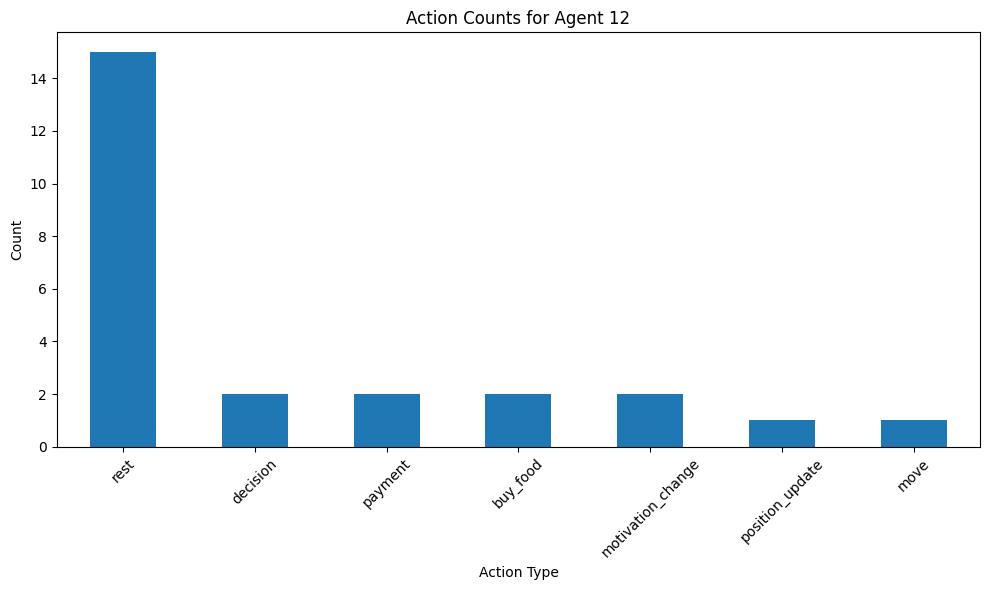

In [9]:
# Plot action counts
action_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Action Counts for Agent {agent_id}')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparing Multiple Agents

We can also compare the actions of multiple agents.

In [10]:
# Choose two agents to compare
agent1_id = person_agents[0].unique_id
agent2_id = person_agents[1].unique_id

# Get actions for both agents
agent1_actions = model.get_agent_actions(agent1_id)
agent2_actions = model.get_agent_actions(agent2_id)

# Count actions by type for each agent
agent1_counts = agent1_actions['action'].value_counts()
agent2_counts = agent2_actions['action'].value_counts()

# Create a DataFrame for comparison
comparison = pd.DataFrame({
    f'Agent {agent1_id}': agent1_counts,
    f'Agent {agent2_id}': agent2_counts
})

# Fill NaN values with 0
comparison = comparison.fillna(0)

# Display comparison
comparison

,Agent 12,Agent 13
action,,
buy_food,2,2
decision,2,2
motivation_change,2,2
move,1,8
payment,2,2
position_update,1,8
rest,15,15


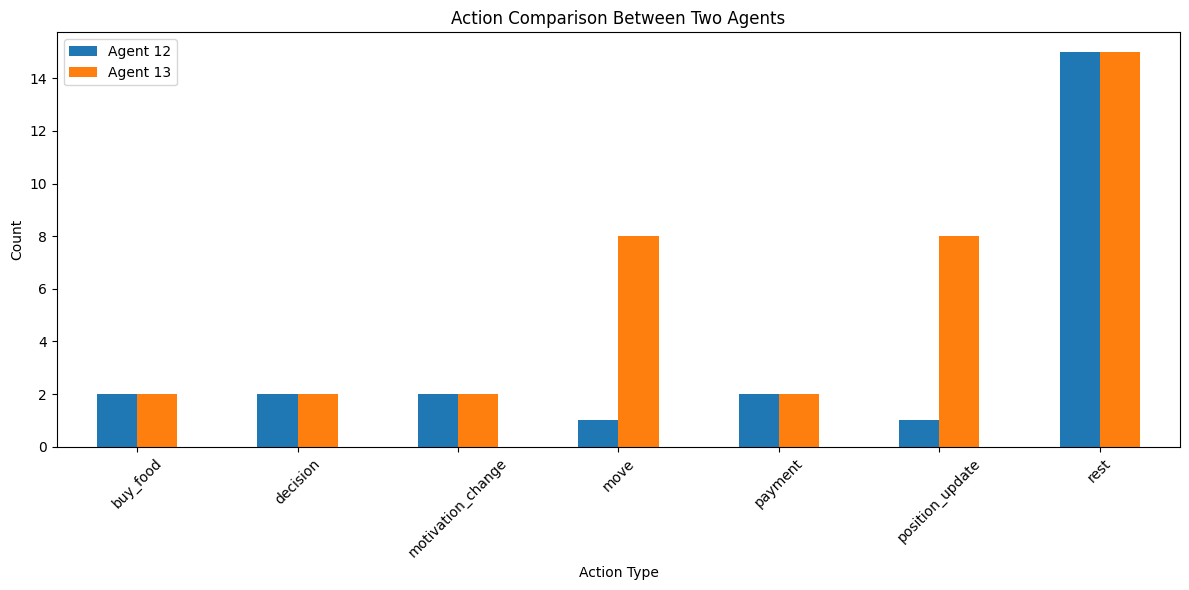

In [11]:
# Plot comparison
comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Action Comparison Between Two Agents')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

The agent action logging system provides a detailed record of all actions performed by agents in the BankCraft simulation. This can be useful for debugging, analyzing agent behavior, and understanding the dynamics of the simulation.